In [1]:
##  Plot Fluctuating Flat Interface ##
import yt
import numpy as np
from skimage import measure

def ih_direct(profile, level = 0):
    """
    Calculates the interface height in the z-direction for a system with a flat interface across the xy plane.

    This function determines the z-coordinate of the interface at each point in the xy plane by identifying where the isocontour of the interface is zero. It uses the `skimage.measure.find_contours` function to perform this calculation.

    Parameters
    ----------
    profile : numpy.ndarray
        A 3D NumPy array representing the order parameter of the system. The array has dimensions `(nx, ny, nz)`, where `nx` is the size in the x-direction and `ny` and `nz` are the sizes in the y- and z-directions, respectively.
           
           z (height)
           |
     _ _ _ |_ _ _ _ _ _ _ _ 
           |__ __ __ y (stripe length)
     _ _ _/__ _ _ _ _ _ _ _ 
         /
        /
       x (thickness of the interface is in the x-direction)
    """
    nx, ny, nz = profile.shape
    index_levels = np.arange(0, ny, 1)
    out = np.zeros((nx, ny))
    for x in range(nx):
        levels = measure.find_contours(profile[x, :, :], level = level)[1]
        #print(levels)
        idxs = np.isin(levels[:, 0], index_levels)
        #print(idxs.shape)
        out[x,:] = levels[idxs, 1]
        #print(out[x].shape)
    return out

# Example usage
alpha0 = 1.5
temperature = 0.
nx = 8
ny = 256
nz = 64
frameIdx = 2000
rho_lo = 0.1
rho_hi = 2.

file_path = "./data_interface/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}/".format(nx, ny, nz) + "plt" + f"{frameIdx:07d}"
ts = yt.load(file_path)
profile_data = ts.covering_grid(
    level=0, left_edge=ts.domain_left_edge, dims=ts.domain_dimensions
)
print(ts.field_list)
profile = profile_data['boxlib', 'rho']
print("input data has shape ", profile.shape)

height = ih_direct(profile, (rho_lo + rho_hi)/2.)
print(height.shape)

yt : [INFO     ] 2025-06-23 11:10:58,294 Parameters: current_time              = 2000.0
yt : [INFO     ] 2025-06-23 11:10:58,294 Parameters: domain_dimensions         = [  8 256  64]
yt : [INFO     ] 2025-06-23 11:10:58,295 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-23 11:10:58,296 Parameters: domain_right_edge         = [1. 1. 1.]


[('boxlib', 'afx'), ('boxlib', 'afy'), ('boxlib', 'afz'), ('boxlib', 'agx'), ('boxlib', 'agy'), ('boxlib', 'agz'), ('boxlib', 'nfbarx'), ('boxlib', 'ngbarx'), ('boxlib', 'p_bulk'), ('boxlib', 'phi'), ('boxlib', 'rho'), ('boxlib', 'ubx'), ('boxlib', 'uby'), ('boxlib', 'ubz'), ('boxlib', 'ufbarx'), ('boxlib', 'ufx'), ('boxlib', 'ufy'), ('boxlib', 'ufz'), ('boxlib', 'ugbarx'), ('boxlib', 'ugx'), ('boxlib', 'ugy'), ('boxlib', 'ugz')]
input data has shape  (8, 256, 64)
(8, 256)


In [ ]:
###   Read in height ensemble ###

step1 = 300000
step2 = 600000
plot_int = 2000
alpha0 = 1.5
temperature = 1e-5
nx = 8
ny = 256
nz = 64
rho_lo = 0.1
rho_hi = 2.

sliceIdx_x = 4
height_arrays = np.zeros(((step2 - step1) // plot_int + 1, ny))
for n in range(step1, step2+plot_int, plot_int):
    plot_file_dir = "./data_interface/lbm_data_shshan_alpha0_" + "{:.2f}".format(alpha0) +\
          "_xi_" + "{:.1e}".format(temperature) + "_size{:d}-{:d}-{:d}_continue/".format(nx, ny, nz) + "plt" + f"{n:07d}"
    ds = yt.load(plot_file_dir)
    profile = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    profile_data = profile['boxlib', 'rho']
    height = ih_direct(profile_data, (rho_lo + rho_hi)/2.)
    height_arrays[(n - step1) // plot_int, :] = height[sliceIdx_x, :]

print(height_arrays)


yt : [INFO     ] 2025-06-23 11:29:51,395 Parameters: current_time              = 300000.0
yt : [INFO     ] 2025-06-23 11:29:51,397 Parameters: domain_dimensions         = [  8 256  64]
yt : [INFO     ] 2025-06-23 11:29:51,397 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-23 11:29:51,399 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-06-23 11:29:51,526 Parameters: current_time              = 302000.0
yt : [INFO     ] 2025-06-23 11:29:51,527 Parameters: domain_dimensions         = [  8 256  64]
yt : [INFO     ] 2025-06-23 11:29:51,528 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-06-23 11:29:51,528 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2025-06-23 11:29:51,637 Parameters: current_time              = 304000.0
yt : [INFO     ] 2025-06-23 11:29:51,638 Parameters: domain_dimensions         = [  8 256  64]
yt : [INFO     ] 2025-06-23 11:29:51,639 Parameters: domain_left_edge        

[[47.51202997 47.52907636 47.50403078 ... 47.50874102 47.51576698
  47.50665606]
 [47.5229468  47.52002188 47.53297709 ... 47.50647976 47.52123654
  47.50961479]
 [47.51728501 47.51577705 47.50052342 ... 47.51402666 47.51397367
  47.51912136]
 ...
 [47.48644994 47.47712111 47.4801464  ... 47.46809402 47.47561649
  47.47812702]
 [47.45680615 47.46295098 47.4506532  ... 47.45811332 47.44911132
  47.45178735]
 [47.5056249  47.48122671 47.49003693 ... 47.48602364 47.49336514
  47.50173592]]


/root/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/root/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


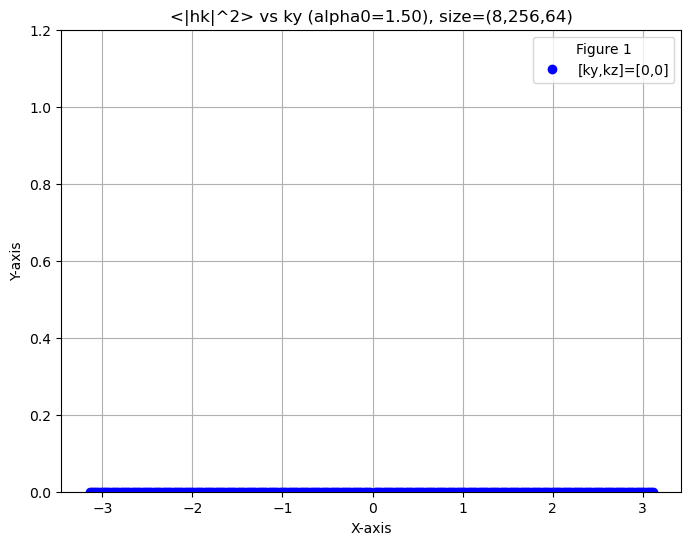

In [ ]:
import numpy as np
from numpy import fft
import matplotlib.pyplot as plt

fft_mode = "forward"

h_k_norm2 = np.zeros((ny), dtype = np.complex128)
ky_fft = fft.fftfreq(ny)*2*np.pi
h_mean = np.mean(height_arrays, axis=0)  # Mean height profile across the ensemble

# height_arrays = np.zeros(((step2 - step1) // plot_int + 1, ny))
for n in range(height_arrays.shape[0]):
    h = height_arrays[n, :]
    h_k = fft.fft(h, norm = fft_mode)
    h_k_norm2 += h_k*h_k.conjugate()
h_k_norm2 /= height_arrays.shape[0]  # Average over the ensemble

plt.figure(1, figsize=(8, 6), dpi=100)  # Optional: Set the figure size
#fig, ax = plt.subplots()
plt.plot(ky_fft, h_k_norm2, label="[ky,kz]=[0,0]", marker='o', linestyle='', color='b') 
plt.legend(title="Figure 1")

plt.xlabel("X-axis")  # X-axis label
plt.ylabel("Y-axis")  # Y-axis label
plt.title("<|hk|^2> vs ky (alpha0={:.2f}), size=({:d},{:d},{:d})".format(alpha0,nx,ny,nz))  # Plot title
plt.ylim(0,1.2)
plt.grid(True)
